<p style="background-color: purple; font-family: newtimeroman; font-size: 250%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b> Credit Score Project</b>

<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 

</p>


- **ID**: The unique identifier for each record in the dataset.
- **Customer_ID**: The unique identifier for each customer.
- **Month**: The month to which the record corresponds.
- **Name**: The name of the customer.
- **Age**: The age of the customer. Note: There are some data quality issues, such as anomalous values.
- **SSN**: The Social Security Number of the customer.
- **Occupation**: The occupation of the customer.
- **Annual_Income**: The annual income of the customer in USD.
- **Monthly_Inhand_Salary**: The monthly take-home (net) salary of the customer in USD.
- **Num_Bank_Accounts**: The number of bank accounts held by the customer.
- **Num_Credit_Card**: The number of credit cards held by the customer.
- **Interest_Rate**: The average interest rate (%) applicable to the customer's loans or credit cards.
- **Num_of_Loan**: The number of loans (including mortgages, personal loans, auto loans, etc.) that the customer has.
- **Type_of_Loan**: The types of loans taken by the customer, listed in a single cell and separated by semicolons.
- **Delay_from_due_date**: The average delay (in days) from the due date for payments across all the customer's loans and credit cards.
- **Num_of_Delayed_Payment**: The total number of times the customer has delayed payments across all loans and credit cards.
- **Changed_Credit_Limit**: Any recent changes to the customer's credit limit (requires further context).
- **Num_Credit_Inquiries**: The number of inquiries made on the customer's credit report, typically indicating applications for new credit.
- **Credit_Mix**: The diversity of credit types held by the customer, affecting credit scores. Specific categories (e.g., "Good", "Bad") need further definition.
- **Outstanding_Debt**: The total outstanding debt the customer has across all loans and credit lines.
- **Credit_Utilization_Ratio**: The ratio of total debt to total available credit, a key indicator of credit risk.
- **Credit_History_Age**: The age of the customer's credit history.
- **Payment_of_Min_Amount**: Indicates whether the customer typically pays at least the minimum amount due on their debts.
- **Total_EMI_per_month**: The total monthly payment the customer makes towards all their loans as EMI (Equated Monthly Installment).
- **Amount_invested_monthly**: The amount of money the customer invests monthly (could be in savings accounts, stocks, bonds, etc.).
- **Payment_Behaviour**: Characterizes the customer's payment behavior in terms of expenditure and value of transactions.
- **Monthly_Balance**: The average monthly balance maintained by the customer in their accounts.
- **Credit_Score**: The credit score of the customer, a summary measure of their creditworthiness.


<a id="2"></a>
# <p style="background-color:darkviolet; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Importing Libraries  </p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from skimpy import clean_columns

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("train.csv")
df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843,NaN,NaN,NaN,1824.843
Num_Bank_Accounts,3,3,3,3,3


In [3]:
df1 = pd.read_csv("test.csv")
df1.head().T

,0,1,2,3,4
ID,0x160a,0x160b,0x160c,0x160d,0x1616
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1
Month,September,October,November,December,September
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj
Age,23,24,24,24_,28
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,004-07-5839
Occupation,Scientist,Scientist,Scientist,Scientist,_______
Annual_Income,19114.12,19114.12,19114.12,19114.12,34847.84
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,NaN,3037.987
Num_Bank_Accounts,3,3,3,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


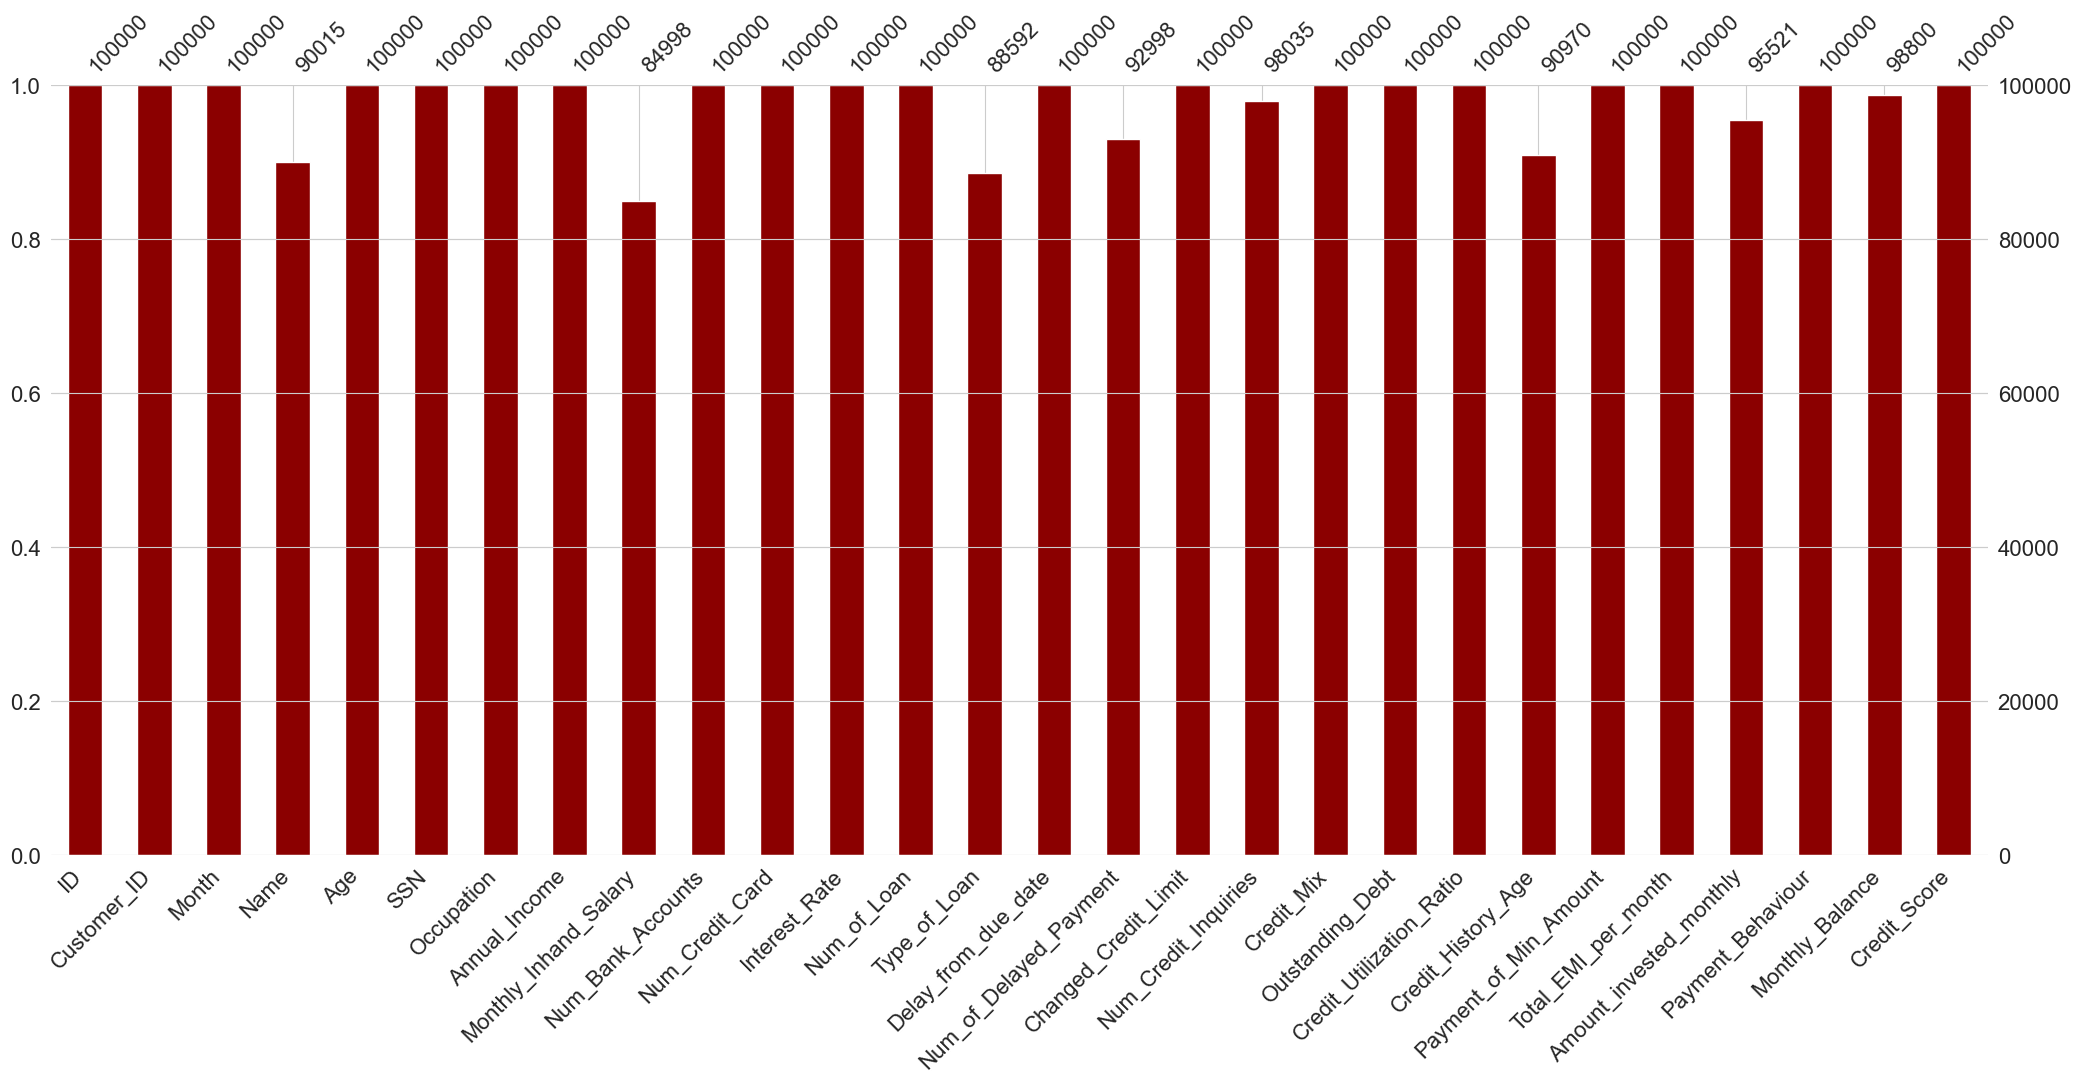

In [6]:
msno.bar(df, color= "darkred");

In [7]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
ID,0,0.000
Customer_ID,0,0.000
Month,0,0.000
Name,9985,9.980
Age,0,0.000
SSN,0,0.000
Occupation,0,0.000
Annual_Income,0,0.000
Monthly_Inhand_Salary,15002,15.000
Num_Bank_Accounts,0,0.000


In [8]:
df=clean_columns(df)
df

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard


In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: id
Number of Unique Values: 100000
First 10 Unique Values: ['0x1602' '0x1603' '0x1604' '0x1605' '0x1606' '0x1607' '0x1608' '0x1609'
 '0x160e' '0x160f']
... and 99990 more unique values

Column: customer_id
Number of Unique Values: 12500
First 10 Unique Values: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08']
... and 12490 more unique values

Column: month
Number of Unique Values: 8
Unique Values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Column: name
Number of Unique Values: 10140
First 10 Unique Values: ['Aaron Maashoh' nan 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur']
... and 10130 more unique values

Column: age
Number of Unique Values: 1788
First 10 Unique Values: ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33']
... and 1778 more unique values

Column: ssn
Number of Unique Values: 12501
First 10 Unique Values: ['821-00-0265

In [10]:
#df.corr(numeric_only= True)

In [11]:
df_numeric = df.select_dtypes(include ="number")

def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color


df_numeric.corr().style.applymap(color_correlation1)

,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,delay_from_due_date,num_credit_inquiries,credit_utilization_ratio,total_emi_per_month
monthly_inhand_salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
num_bank_accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
num_credit_card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
interest_rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
num_credit_inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
credit_utilization_ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
total_emi_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


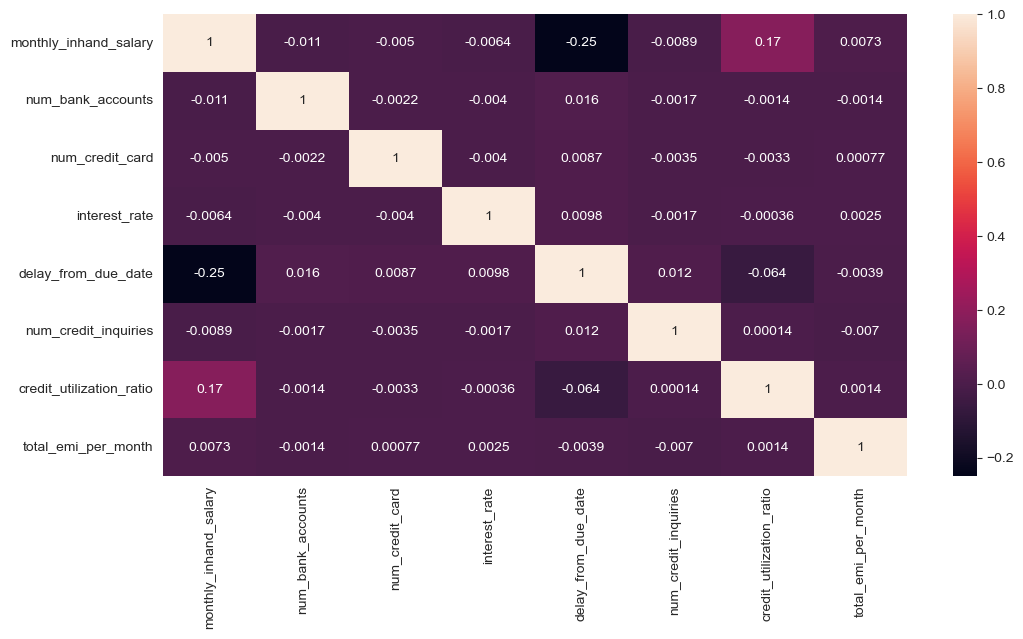

In [12]:
sns.heatmap(data=df.corr(numeric_only= True), annot=True);


In [13]:
df = df.drop(columns=['id', 'customer_id', 'name', 'ssn','type_of_loan'], axis = 1)
df

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,January,23,Scientist,19114.12,1824.843,3,4,3,4,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843,3,4,3,4,6,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.416,4,6,7,2,23,...,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,May,25,Mechanic,39628.99,3359.416,4,6,7,2,18,...,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,June,25,Mechanic,39628.99,3359.416,4,6,5729,2,27,...,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,July,25,Mechanic,39628.99,3359.416,4,6,7,2,20,...,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard


### monthly_inhand_salary

In [14]:
df['monthly_inhand_salary'].fillna(df['monthly_inhand_salary'].median(), inplace=True)


### Age

In [ ]:
df['age'] = df['age'].str.replace('-', '').str.replace('_', '')

### delay_from_due_date

In [ ]:
df['delay_from_due_date'] = df['delay_from_due_date'].str.replace('-', '')

### annual_income

### num_of_delayed_payment

In [15]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].str.replace('-', '').str.replace('_', '')
df['num_of_delayed_payment'] = pd.to_numeric(df['num_of_delayed_payment'], errors='coerce')

df['num_of_delayed_payment'].fillna(df['num_of_delayed_payment'].median(), inplace=True)

In [16]:
df['num_of_delayed_payment'].value_counts()

num_of_delayed_payment
14.000      11195
19.000       5481
17.000       5412
16.000       5312
10.000       5309
            ...  
848.000         1
4134.000        1
1530.000        1
1502.000        1
2047.000        1
Name: count, Length: 708, dtype: int64

### Month

In [17]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}
df['Month'] = df['month'].map(months)


### num_credit_inquiries

In [18]:

df['num_credit_inquiries'].fillna(df['num_credit_inquiries'].median(), inplace=True)

### payment_of_min_amount

In [19]:
df['payment_of_min_amount'].replace({'NM': 'No'}, inplace=True)
df = pd.get_dummies(df, columns=['credit_mix', 'payment_of_min_amount'])

df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,payment_behaviour,monthly_balance,credit_score,Month,credit_mix_Bad,credit_mix_Good,credit_mix_Standard,credit_mix__,payment_of_min_amount_No,payment_of_min_amount_Yes
0,January,23,Scientist,19114.12,1824.843,3,4,3,4,3,...,High_spent_Small_value_payments,312.49408867943663,Good,1,False,False,False,True,True,False
1,February,23,Scientist,19114.12,3093.745,3,4,3,4,-1,...,Low_spent_Large_value_payments,284.62916249607184,Good,2,False,True,False,False,True,False
2,March,-500,Scientist,19114.12,3093.745,3,4,3,4,3,...,Low_spent_Medium_value_payments,331.2098628537912,Good,3,False,True,False,False,True,False
3,April,23,Scientist,19114.12,3093.745,3,4,3,4,5,...,Low_spent_Small_value_payments,223.45130972736786,Good,4,False,True,False,False,True,False
4,May,23,Scientist,19114.12,1824.843,3,4,3,4,6,...,High_spent_Medium_value_payments,341.48923103222177,Good,5,False,True,False,False,True,False


### credit_history_age_months

In [20]:

def years_months_to_months(period):
    if pd.isnull(period):
        return period
    
    parts = period.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

df['credit_history_age_months'] = df['credit_history_age'].apply(years_months_to_months)
df[['credit_history_age', 'credit_history_age_months']].head()


,credit_history_age,credit_history_age_months
0,22 Years and 1 Months,265.000
1,NaN,NaN
2,22 Years and 3 Months,267.000
3,22 Years and 4 Months,268.000
4,22 Years and 5 Months,269.000


In [21]:

df['credit_history_age_months'].fillna(df['credit_history_age_months'].median(), inplace=True)


In [22]:
df=df.drop("credit_history_age",axis=1)


### amount_invested_monthly	

In [23]:
# Convert columns to numeric, coercing errors to NaN
df['amount_invested_monthly'] = pd.to_numeric(df['amount_invested_monthly'], errors='coerce')

median_amount_invested_monthly = df['amount_invested_monthly'].median()

# Fill in missing values with the respective medians
df['amount_invested_monthly'].fillna(median_amount_invested_monthly, inplace=True)


### monthly_balance

In [24]:
df['monthly_balance'] = pd.to_numeric(df['monthly_balance'], errors='coerce')
median_monthly_balance = df['monthly_balance'].median()
df['monthly_balance'].fillna(median_monthly_balance, inplace=True)


In [25]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
month,0,0.000
age,0,0.000
occupation,0,0.000
annual_income,0,0.000
monthly_inhand_salary,0,0.000
num_bank_accounts,0,0.000
num_credit_card,0,0.000
interest_rate,0,0.000
num_of_loan,0,0.000
delay_from_due_date,0,0.000


In [26]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: month
Number of Unique Values: 8
Unique Values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Column: age
Number of Unique Values: 1788
First 10 Unique Values: ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33']
... and 1778 more unique values

Column: occupation
Number of Unique Values: 16
First 10 Unique Values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist']
... and 6 more unique values

Column: annual_income
Number of Unique Values: 18940
First 10 Unique Values: ['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4']
... and 18930 more unique values

Column: monthly_inhand_salary
Number of Unique Values: 13235
First 10 Unique Values: [ 1824.84333333  3093.745       3037.98666667 12187.22
  2612.49083333  2853.30916667  5988.705      11242.78333333
 10469.20775939  2611.115     ]
... and 13225 more unique values

Colum

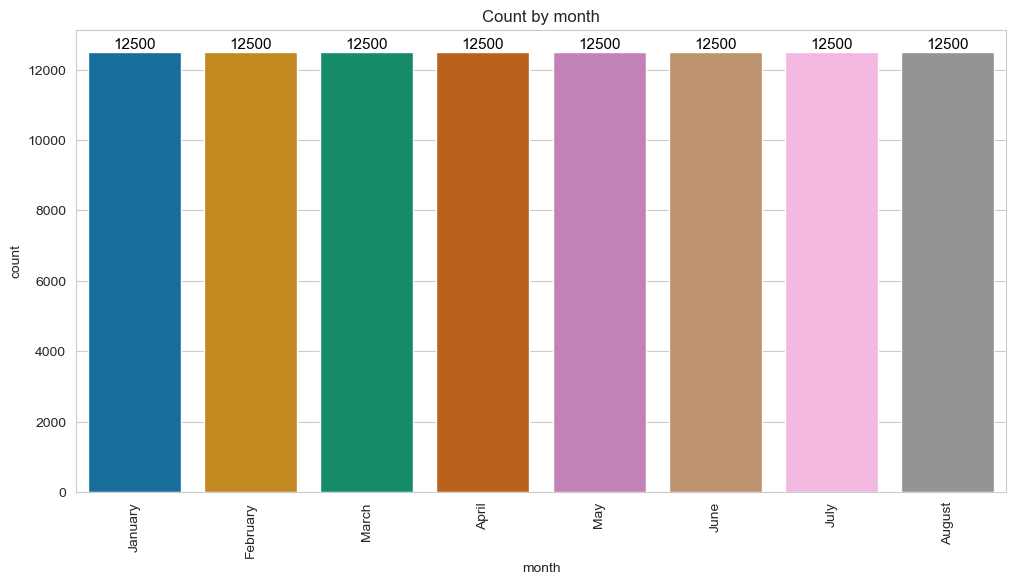

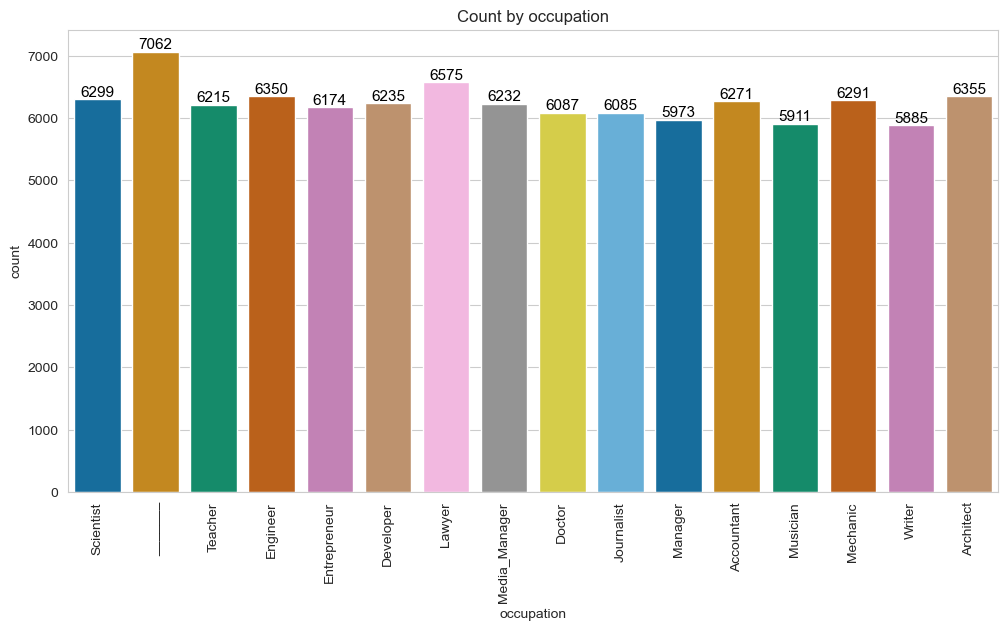

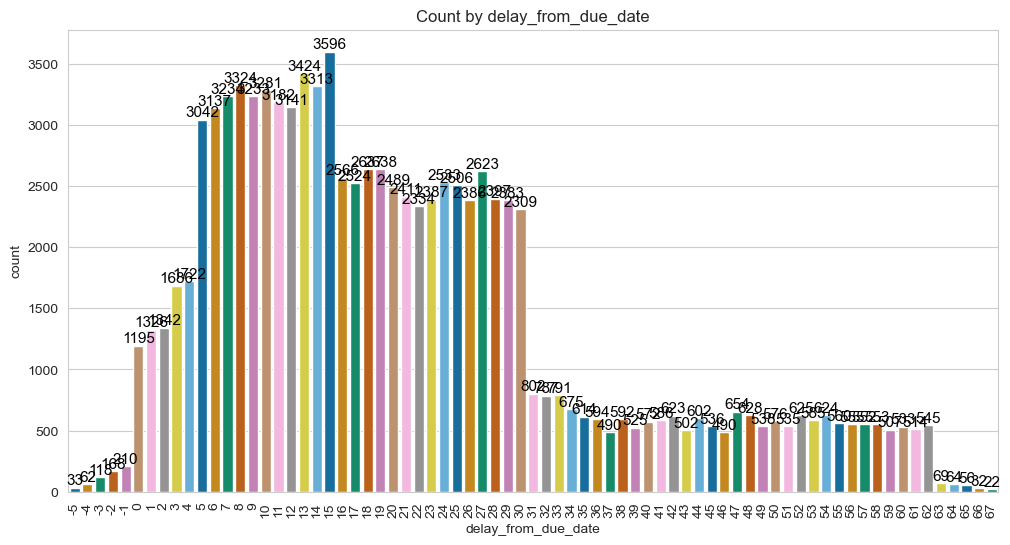

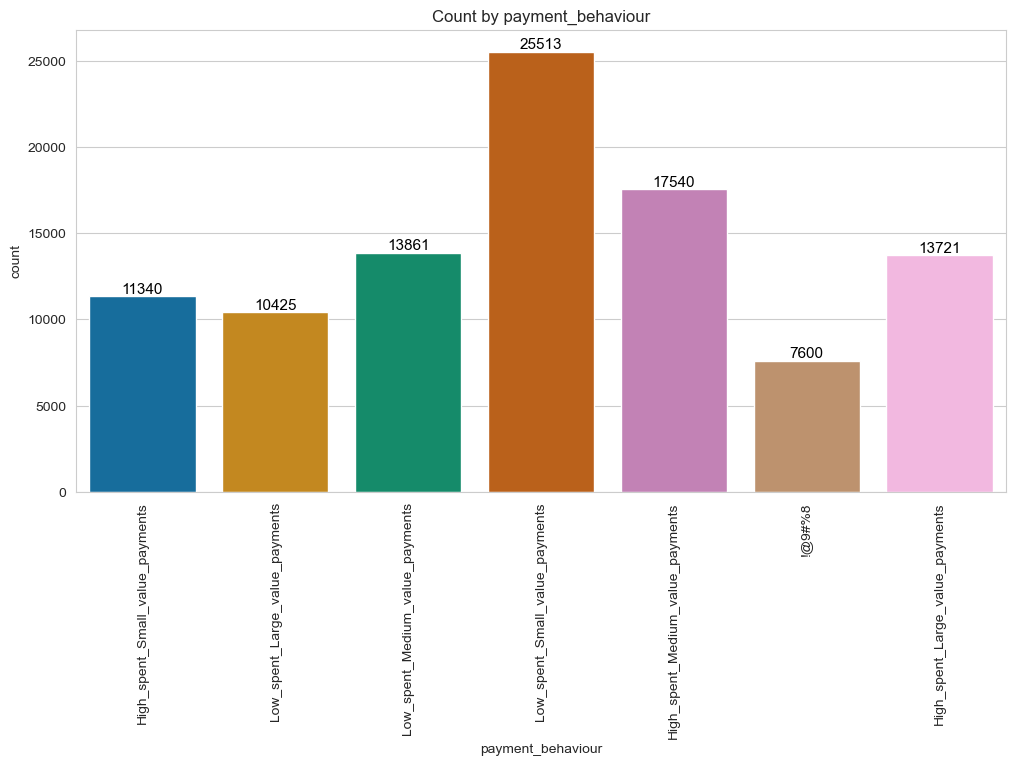

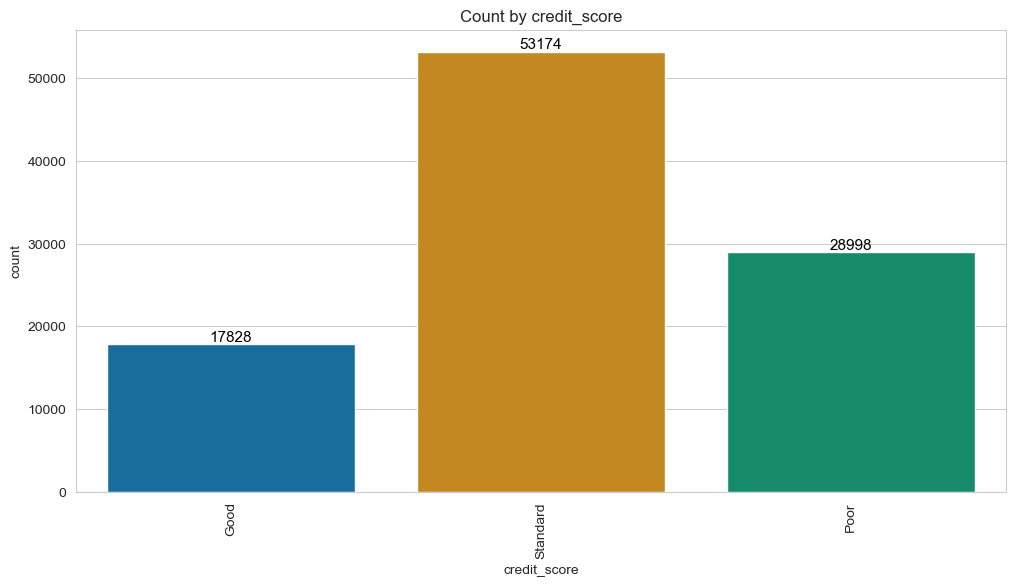

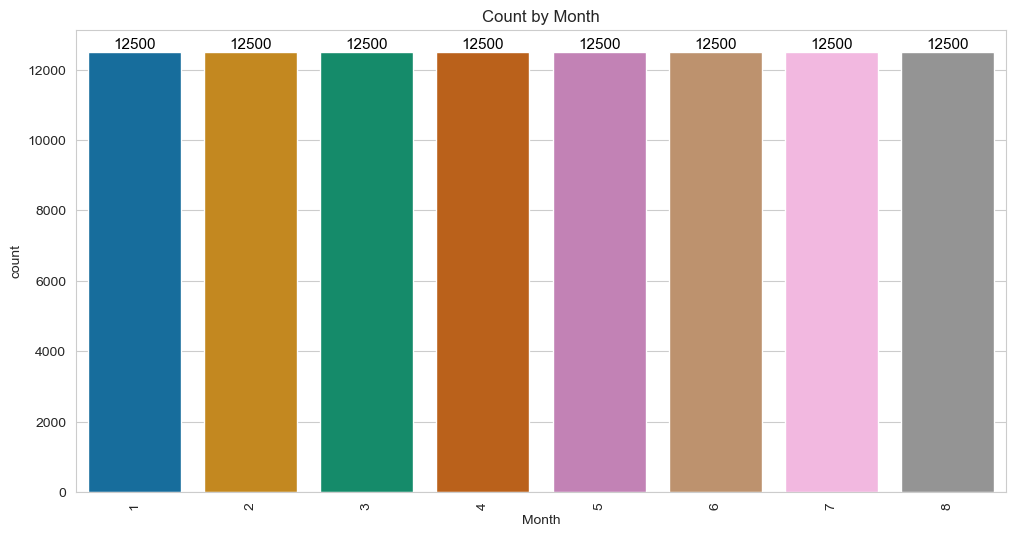

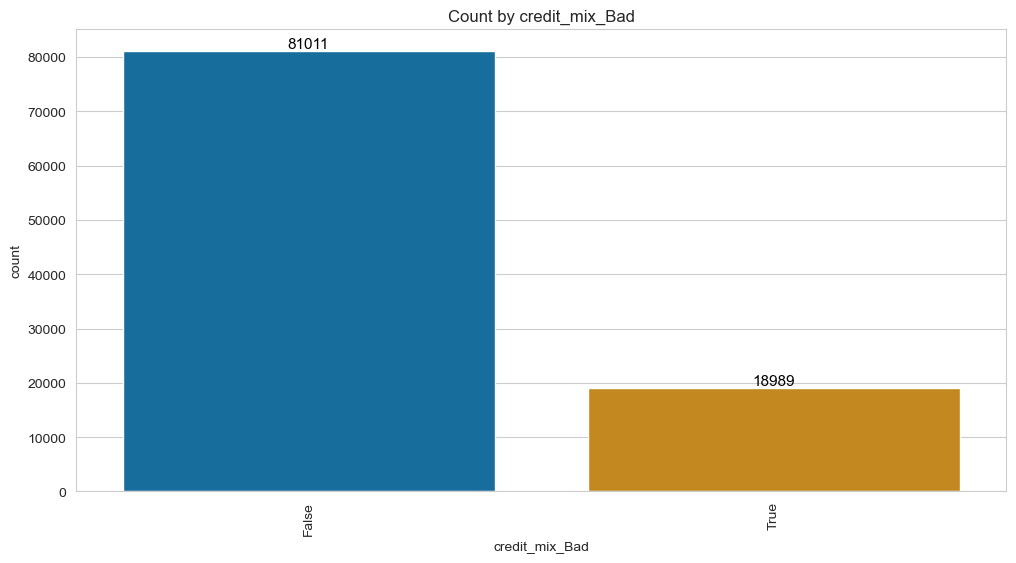

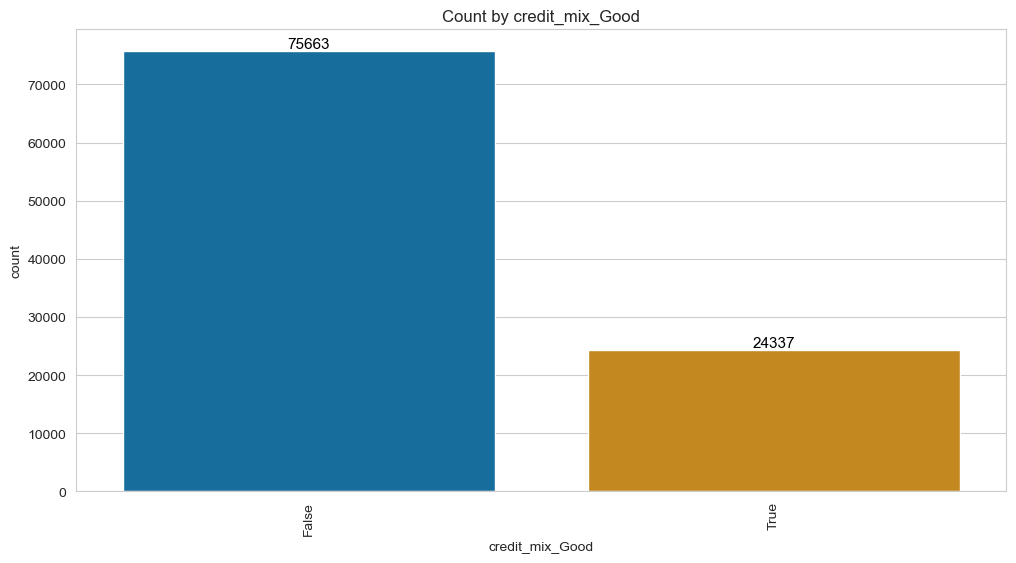

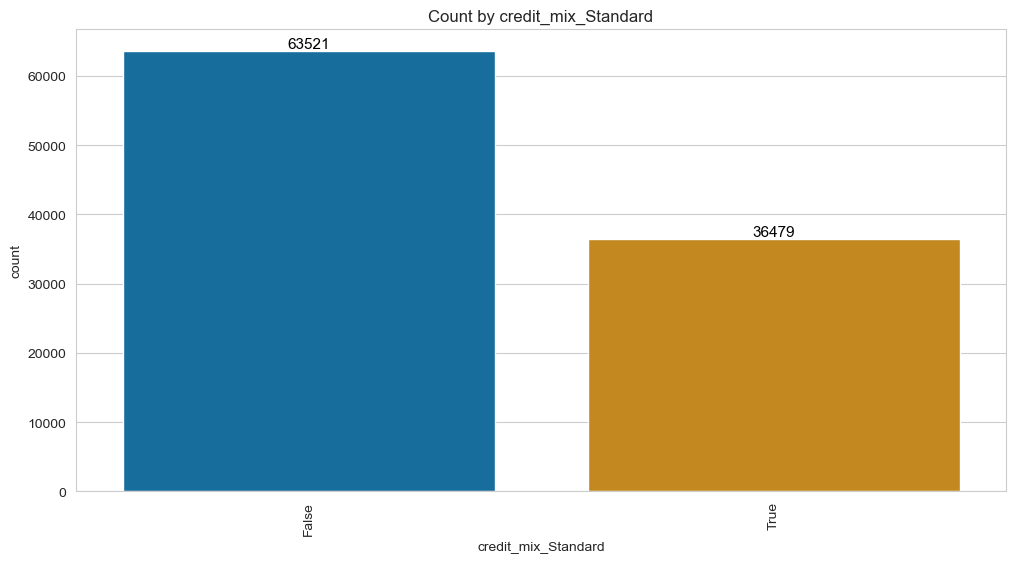

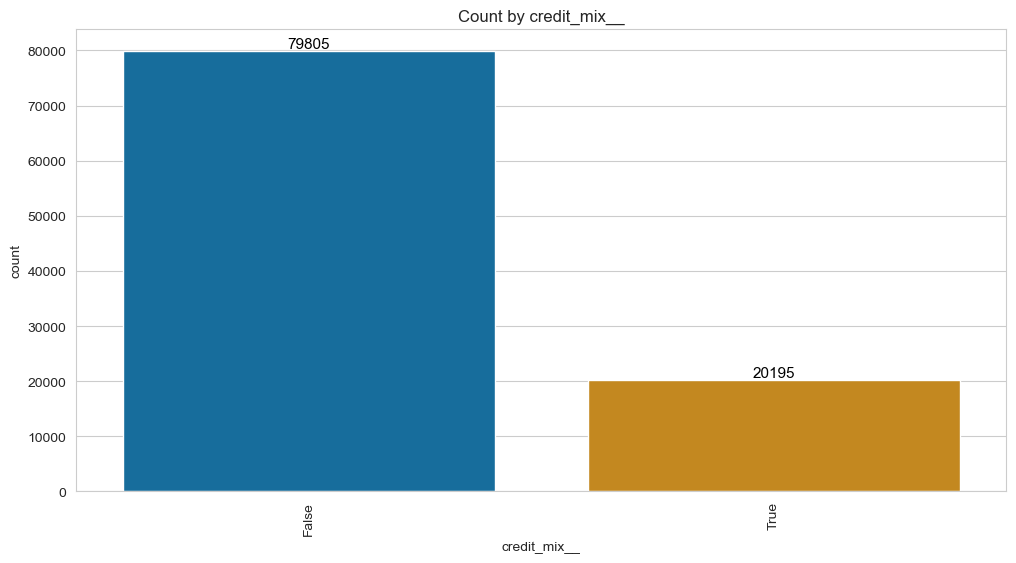

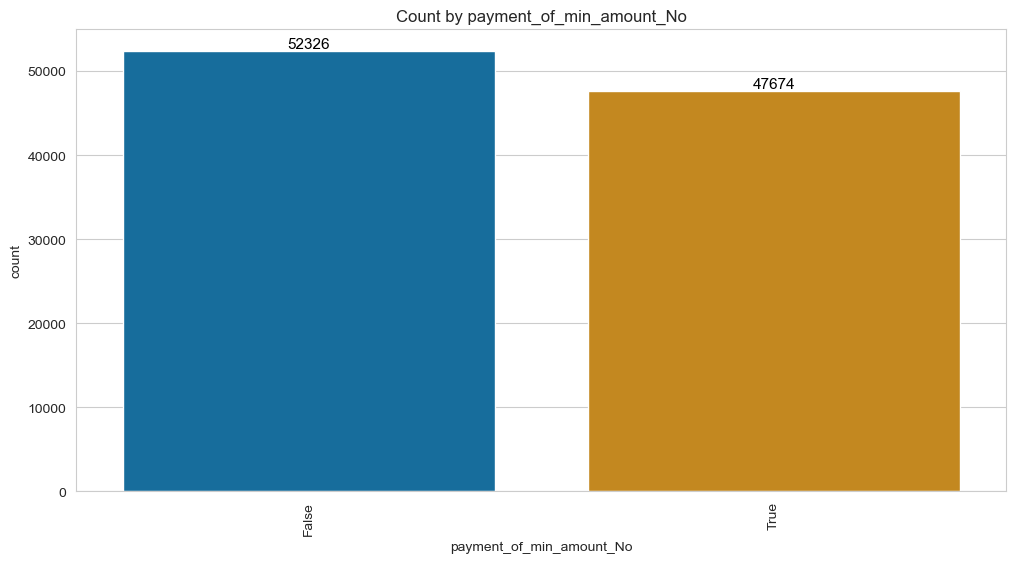

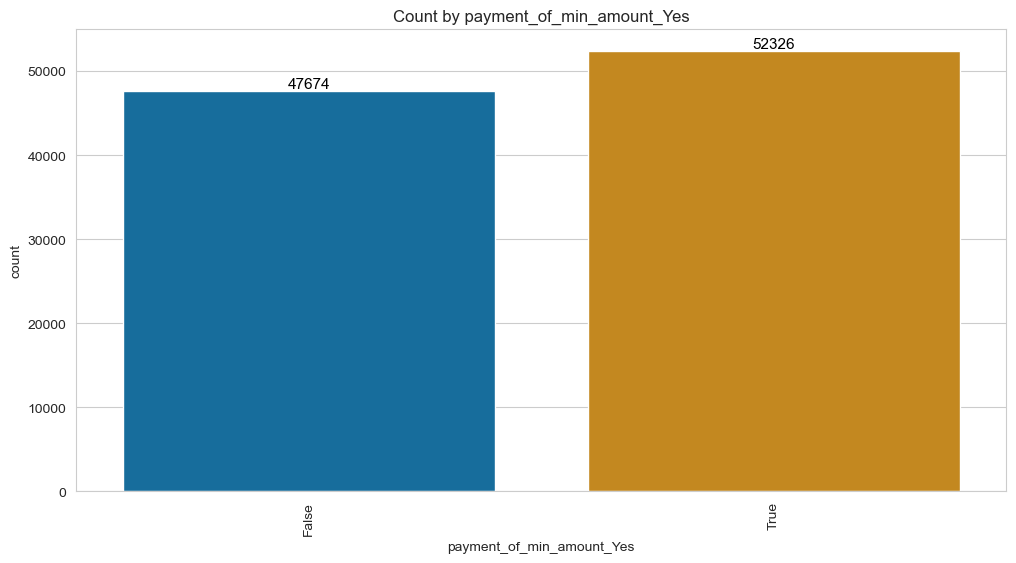

In [27]:
max_unique_values = 100

for col in df.columns:
    if col in df and df[col].nunique() <= max_unique_values:
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x=col, data= df, palette="colorblind")
        
        plt.title(f"Count by {col}")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        
        # Adding counts above each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
plt.show()

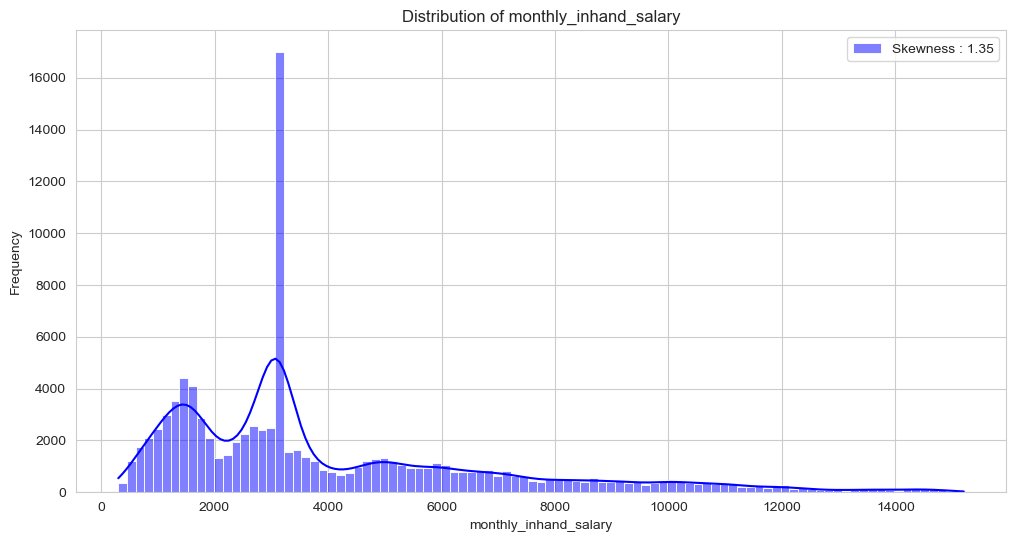

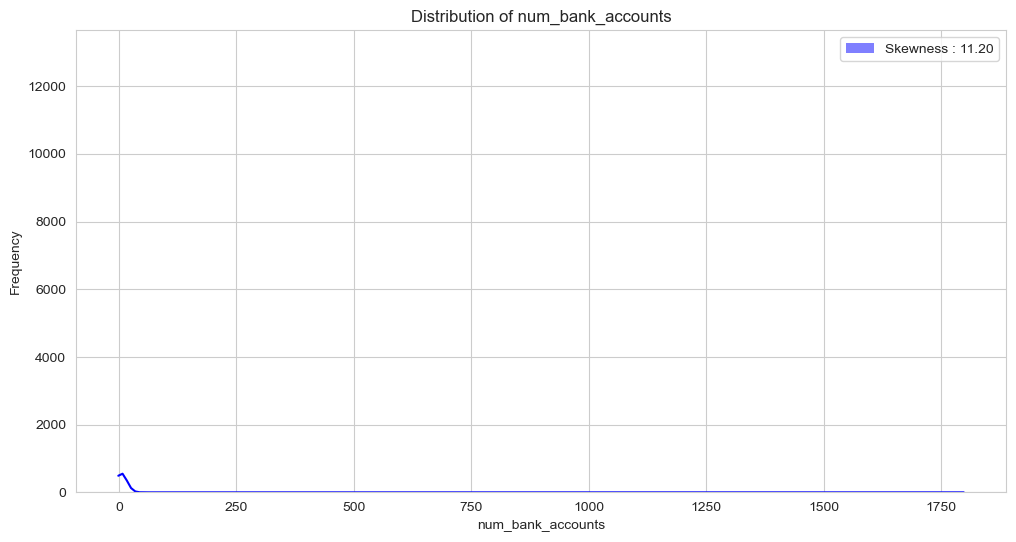

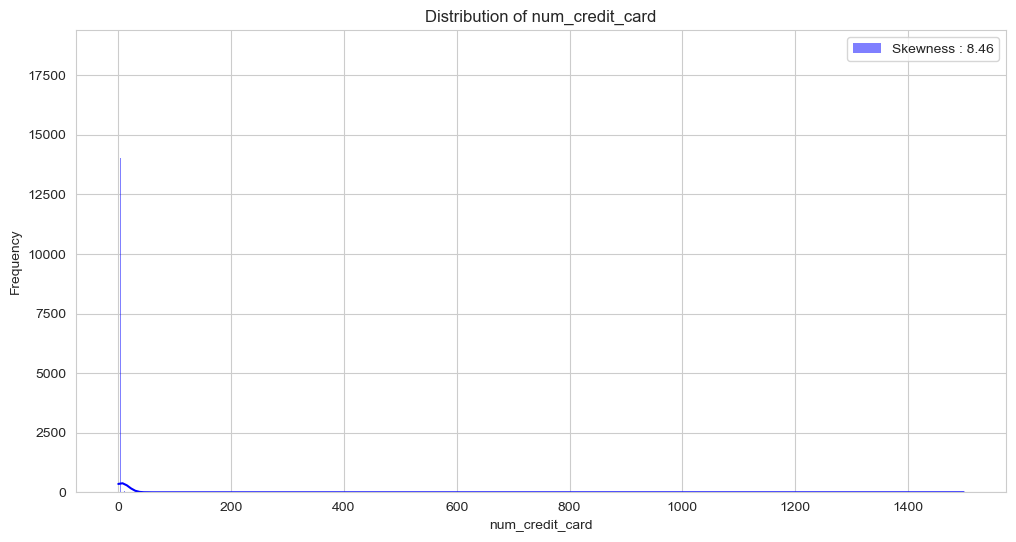

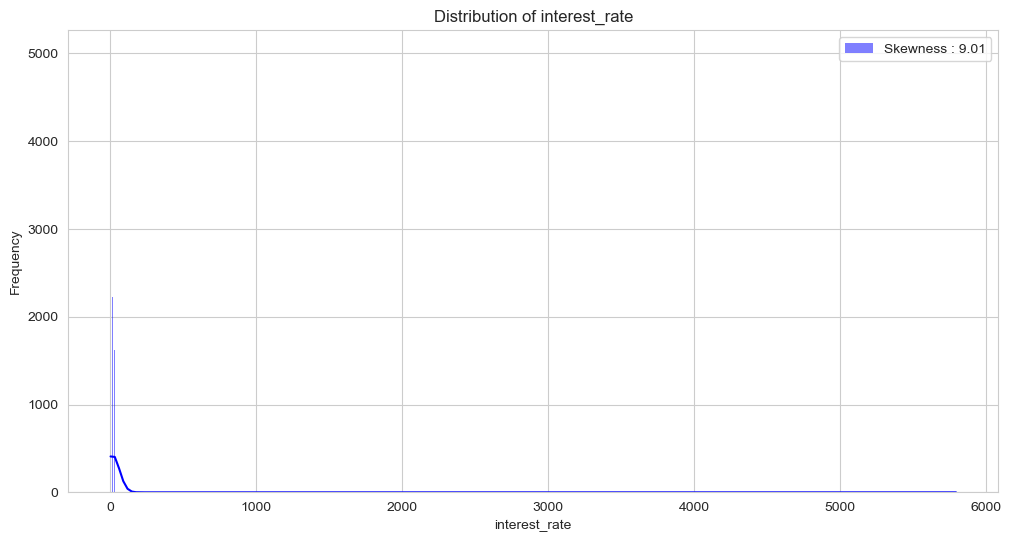

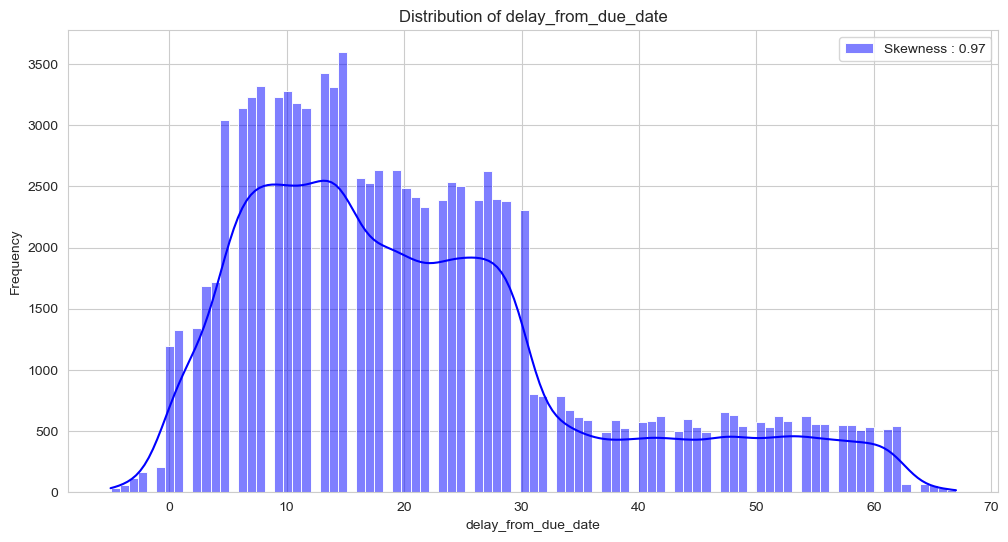

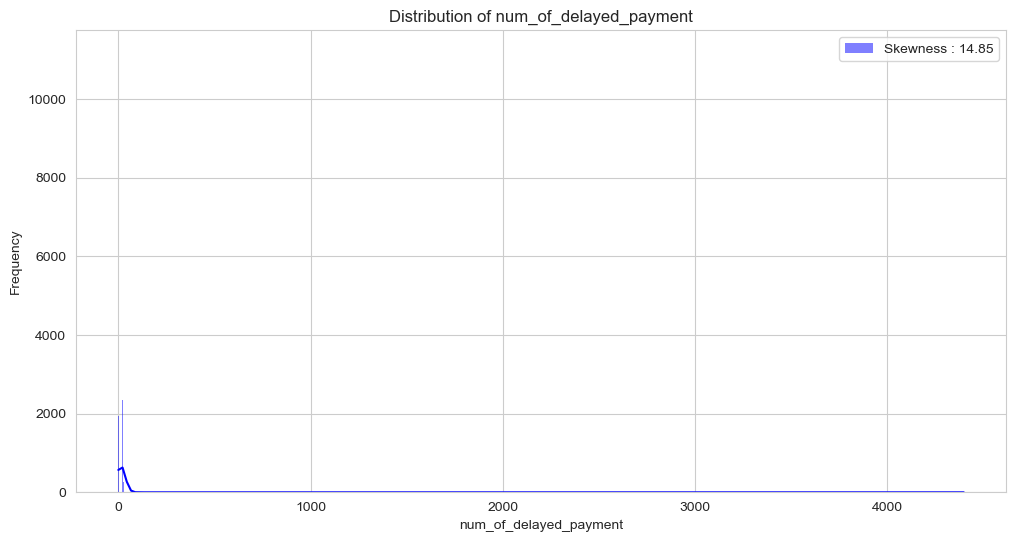

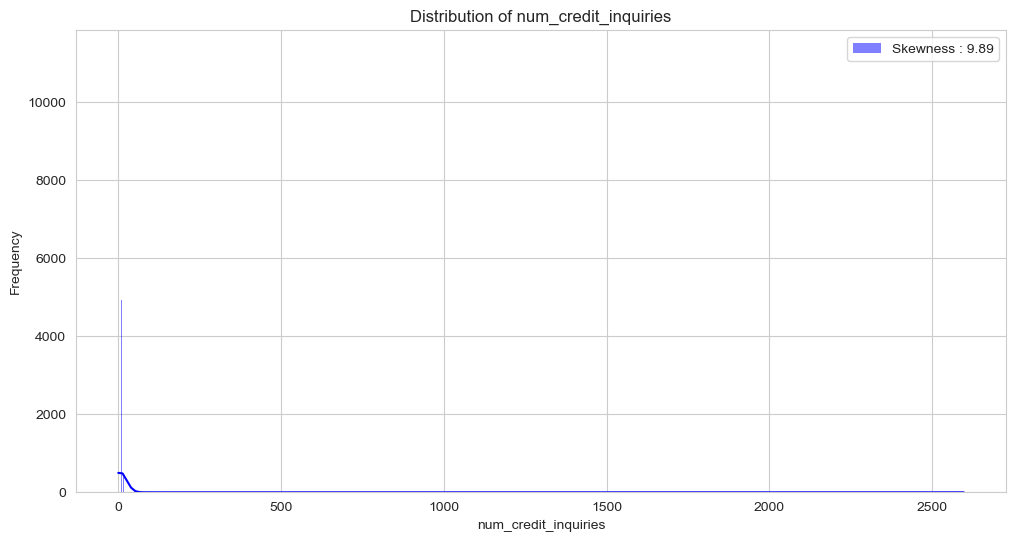

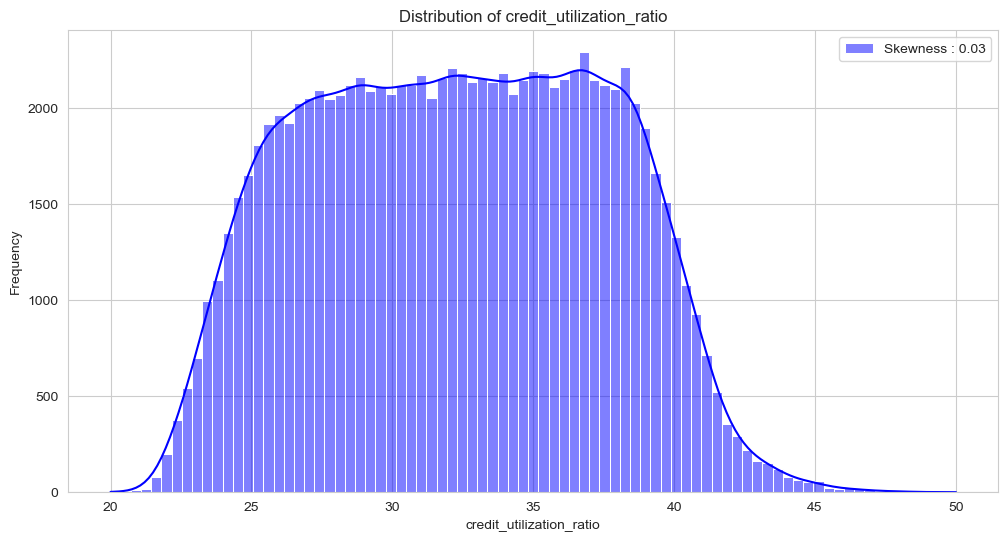

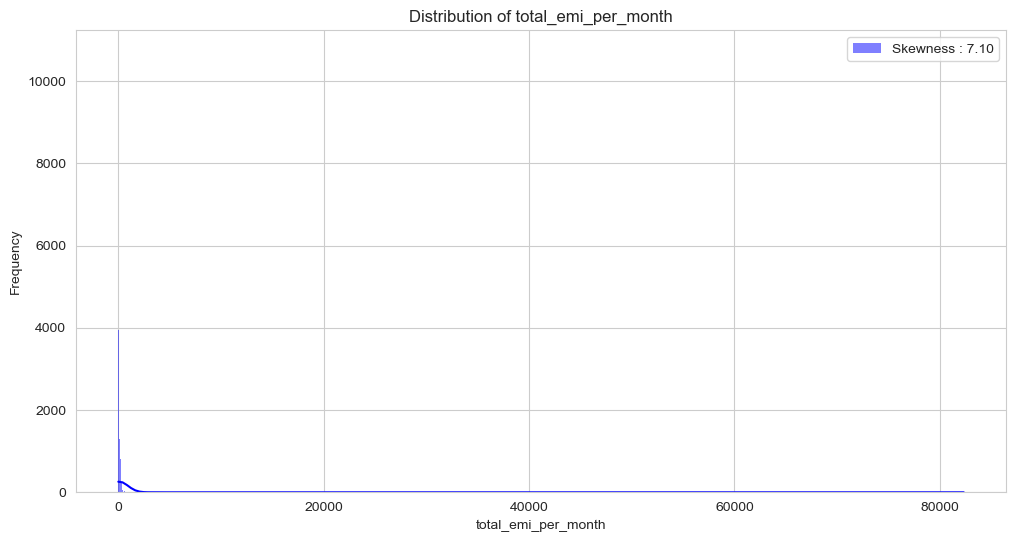

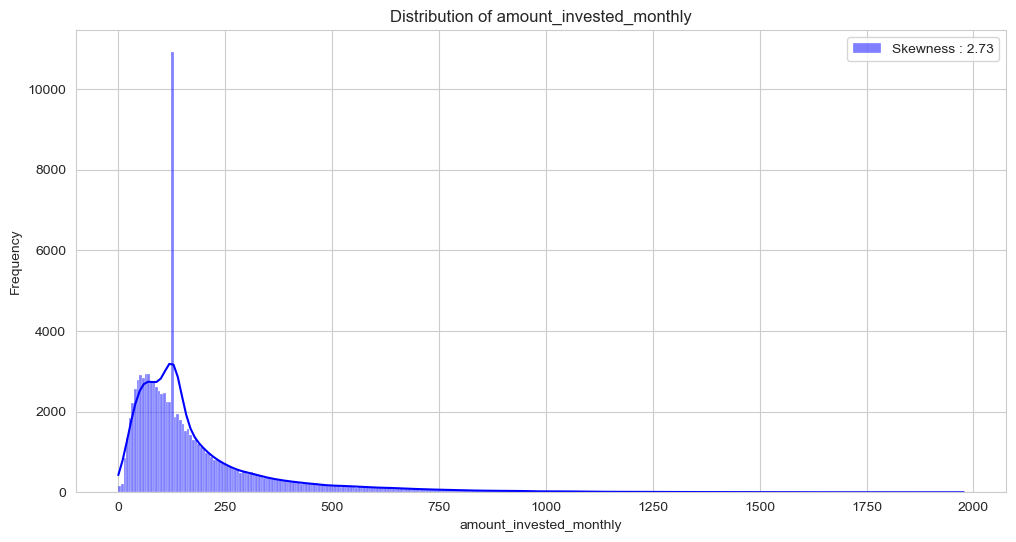

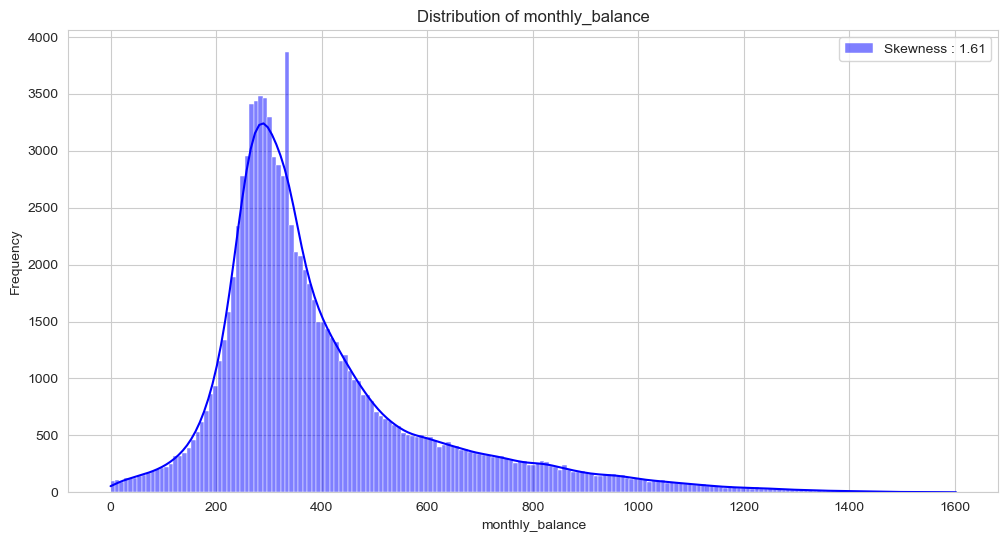

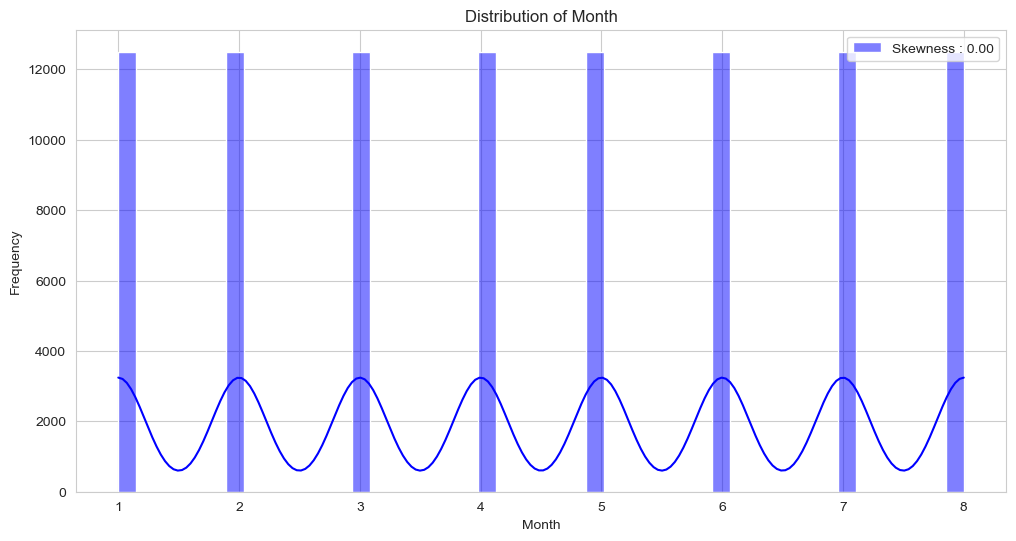

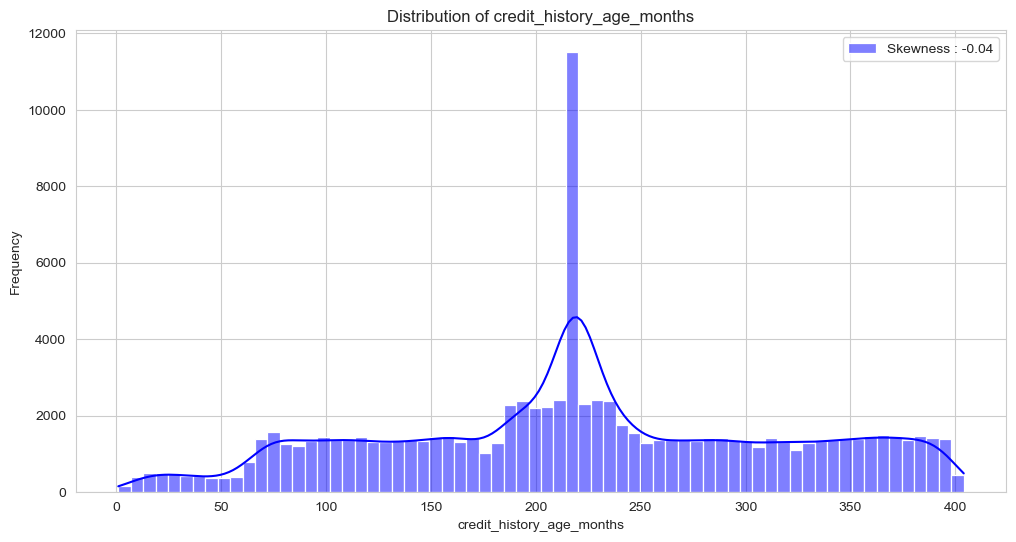

In [28]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="b", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
corr_values = df_numeric.corr()["price"].sort_values()
colors = plt.cm.viridis(np.linspace(0, 1, len(corr_values)))

ax = corr_values.plot.barh(color=colors)
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

KeyError: 'price'

In [ ]:
import plotly.express as px

def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'Credit_Score')
 
create_pie_chart_of_count(df, 'Payment_Behaviour')
create_pie_chart_of_count(df, 'Occupation')

In [ ]:
sns.pairplot(data=df, hue='credit_score',corner =True)
plt.show()

In [ ]:
specific_columns = ["age", "spending_score", "annual_income"]

plt.figure(figsize=(18, 6))

for i, col in enumerate(specific_columns, 1):
    plt.subplot(1, len(specific_columns), i)
    sns.boxplot(y=col, data=df, hue="gender",palette ="Dark2")
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=df['age'], y=df['annual_income'], 
                    z=df['spending_score'], color=df["gender"])
fig.show()

## Data Preprocessing

### Credit Score 

In [ ]:
df['credit_score'].value_counts()

In [ ]:
class_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}
df['credit_score'] = df['credit_score'].map(class_mapping)

### Occupation

In [ ]:
# Assuming 'occupation' is still a single column in your DataFrame and contains placeholder or less frequent values
# First, replace any placeholder value with 'Unknown' or another appropriate value
df['occupation'].replace('________', 'Unknown', inplace=True)

# If you're considering combining less frequent categories into an 'Other' category
# Here's a simple way to do it, assuming 'less_frequent_occupations' is a list of such occupations
less_frequent_occupations = ['Musician', 'Journalist'] # example categories to combine
df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x in less_frequent_occupations else x)

# Now, when you encode, these less frequent occupations will be grouped together
df = pd.get_dummies(df, columns=['occupation'])
# Rename 'occupation________' to 'occupation_Unknown' for clarity
df.rename(columns={'occupation________': 'occupation_Unknown'}, inplace=True)